# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [4]:
from keras.datasets import cifar100
import numpy as np

# Load the CIFAR-100 dataset

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print(x_train.shape) # (50000, 32, 32, 3)
print(y_train.shape) # (50000, 1)

# Dimension is 32x32. There are 3 channels (RGB)

test_img = x_train[0]

print(test_img.shape) # (32, 32, 3)

print(x_train.data)

(50000, 32, 32, 3)
(50000, 1)
(32, 32, 3)


In [5]:
y_train

#cifar100.load_data(label_mode="")
#y_test

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [6]:
# Getting labels
num_classes = len(np.unique(y_train))
print(f'There are {num_classes} classes in the dataset')

There are 100 classes in the dataset


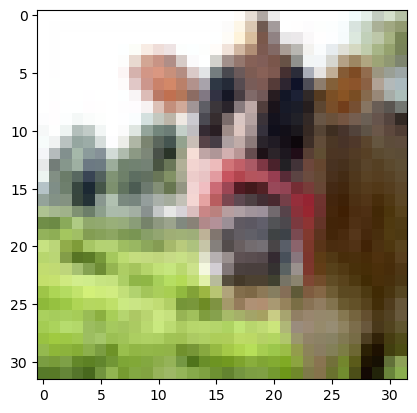

In [7]:
# Display the first image in the training data
import matplotlib.pyplot as plt

plt.imshow(test_img)
plt.show()

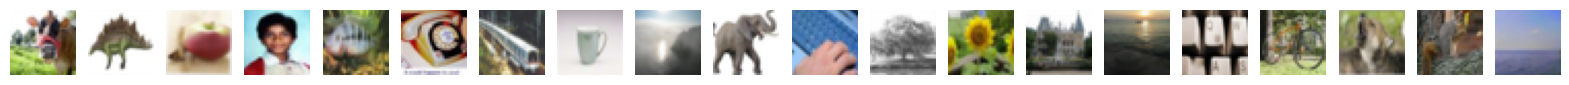

In [8]:
# Display the first 20 images in the training data
fig, axes = plt.subplots(1, 20, figsize=(20, 20))

for i in range(20):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
# To normalize the images, we can divide by 255
x_train = x_train / 255
x_test = x_test / 255

# Split the training data into training and validation data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [10]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of y_train: (40000, 1)
Shape of y_val: (10000, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

model.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        80,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,148 (367.77 KB)

 Trainable params: 94,148 (367.77 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [12]:
from keras import optimizers
from keras import losses

model.compile(optimizer="adam", loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# I used adam optimizer because it is the most popular optimizer and it is efficient
# I used SparseCategoricalCrossentropy because it is used for multi-class classification problems

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [13]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

# I tried to use 15 epochs because when I tried less I got very bad accuracy so it looks like for this dataset 15 epochs gives better results

Epoch 1/15


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0836 - loss: 4.1079 - val_accuracy: 0.2320 - val_loss: 3.2573
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2626 - loss: 3.1099 - val_accuracy: 0.2777 - val_loss: 3.0246
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3248 - loss: 2.7722 - val_accuracy: 0.3080 - val_loss: 2.9003
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3702 - loss: 2.5543 - val_accuracy: 0.3068 - val_loss: 2.8740
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3976 - loss: 2.4149 - val_accuracy: 0.3155 - val_loss: 2.8444
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4194 - loss: 2.2863 - val_accuracy: 0.3145 - val_loss: 2.8767
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4402 - loss: 2.1959 - val_accuracy: 0.3219 - val_loss: 2.8988
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4569 - loss: 2.1127 - va

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('Accuracy', test_acc)
print('Loss', test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.3090 - loss: 3.1660
Accuracy 0.3089999854564667
Loss 3.1659586429595947


In [15]:
# There are other numerical evaluation metrics like precision, recall, F1 score. I will try to calculate them for the model

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Predict the class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification

# For multi-class classification, use the following:
y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Detailed classification report
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 1.0
Recall: 0.01
F1 Score: 0.019801980198019802
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00  

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [16]:
# Precision 1.0 means that the model is predicting all the classes correctly
# Recall 0.0079 is pretty low. 
# F1 Score 0.0156 is also very low. There is a bad balance between precision and recall.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

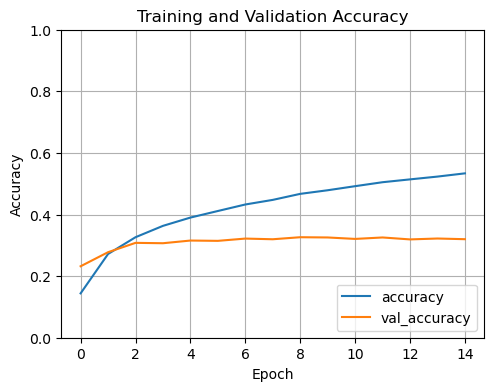

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [18]:
from keras.layers import Dropout

model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch > 10:
        return initial_lr * 0.5
    return initial_lr

lr_scheduler = LearningRateScheduler(lr_schedule)
model2.compile(optimizer="adam", loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model2.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=35,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/35


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


   5/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.0041 - loss: 4.6154    

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.0288 - loss: 4.4120 - val_accuracy: 0.1034 - val_loss: 3.8529 - learning_rate: 0.0010
Epoch 2/35


/opt/miniconda3/envs/dsi_participant/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-08-06 00:27:22.375558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1034 - val_loss: 3.8529 - learning_rate: 0.0010
Epoch 3/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.0884 - loss: 3.9299 - val_accuracy: 0.1523 - val_loss: 3.5519 - learning_rate: 0.0010
Epoch 4/35


2024-08-06 00:27:42.543153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1523 - val_loss: 3.5519 - learning_rate: 0.0010
Epoch 5/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1266 - loss: 3.6973 - val_accuracy: 0.1808 - val_loss: 3.3777 - learning_rate: 0.0010
Epoch 6/35


2024-08-06 00:28:01.660718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1808 - val_loss: 3.3777 - learning_rate: 0.0010
Epoch 7/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1475 - loss: 3.5745 - val_accuracy: 0.2133 - val_loss: 3.2221 - learning_rate: 0.0010
Epoch 8/35


2024-08-06 00:28:17.894653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2133 - val_loss: 3.2221 - learning_rate: 0.0010
Epoch 9/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1684 - loss: 3.4680 - val_accuracy: 0.2277 - val_loss: 3.1527 - learning_rate: 0.0010
Epoch 10/35


2024-08-06 00:28:35.422638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2277 - val_loss: 3.1527 - learning_rate: 0.0010
Epoch 11/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1861 - loss: 3.3773 - val_accuracy: 0.2421 - val_loss: 3.0925 - learning_rate: 0.0010
Epoch 12/35


2024-08-06 00:28:52.482580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2421 - val_loss: 3.0925 - learning_rate: 5.0000e-04
Epoch 13/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.2011 - loss: 3.2796 - val_accuracy: 0.2515 - val_loss: 3.0178 - learning_rate: 5.0000e-04
Epoch 14/35


2024-08-06 00:29:10.610894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2515 - val_loss: 3.0178 - learning_rate: 5.0000e-04
Epoch 15/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2134 - loss: 3.2276 - val_accuracy: 0.2725 - val_loss: 2.9287 - learning_rate: 5.0000e-04
Epoch 16/35


2024-08-06 00:29:28.253045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2725 - val_loss: 2.9287 - learning_rate: 5.0000e-04
Epoch 17/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2186 - loss: 3.2053 - val_accuracy: 0.2845 - val_loss: 2.8550 - learning_rate: 5.0000e-04
Epoch 18/35


2024-08-06 00:29:45.649791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2845 - val_loss: 2.8550 - learning_rate: 5.0000e-04
Epoch 19/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2246 - loss: 3.1611 - val_accuracy: 0.2763 - val_loss: 2.8813 - learning_rate: 5.0000e-04
Epoch 20/35


2024-08-06 00:30:02.798993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2763 - val_loss: 2.8813 - learning_rate: 5.0000e-04
Epoch 21/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2328 - loss: 3.1309 - val_accuracy: 0.2945 - val_loss: 2.8159 - learning_rate: 5.0000e-04
Epoch 22/35


2024-08-06 00:30:21.043041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2945 - val_loss: 2.8159 - learning_rate: 5.0000e-04
Epoch 23/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2350 - loss: 3.1206 - val_accuracy: 0.2990 - val_loss: 2.7746 - learning_rate: 5.0000e-04
Epoch 24/35


2024-08-06 00:30:39.292191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2990 - val_loss: 2.7746 - learning_rate: 5.0000e-04
Epoch 25/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2416 - loss: 3.0822 - val_accuracy: 0.2969 - val_loss: 2.7811 - learning_rate: 5.0000e-04
Epoch 26/35


2024-08-06 00:30:56.441270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2969 - val_loss: 2.7811 - learning_rate: 5.0000e-04
Epoch 27/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2400 - loss: 3.0642 - val_accuracy: 0.2917 - val_loss: 2.8107 - learning_rate: 5.0000e-04
Epoch 28/35


2024-08-06 00:31:13.577596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2917 - val_loss: 2.8107 - learning_rate: 5.0000e-04
Epoch 29/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2455 - loss: 3.0562 - val_accuracy: 0.3084 - val_loss: 2.7218 - learning_rate: 5.0000e-04
Epoch 30/35


2024-08-06 00:31:31.168347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3084 - val_loss: 2.7218 - learning_rate: 5.0000e-04
Epoch 31/35
 654/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.2461 - loss: 3.0334

KeyboardInterrupt: 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.